<a href="https://colab.research.google.com/github/watermelonDrip/Collected-Mistakes/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 机器学习练习 2 - 逻辑回归

在这一次练习中，我们将要实现逻辑回归并且应用到一个分类任务。我们还将通过将正则化加入训练算法，来提高算法的鲁棒性，并用更复杂的情形来测试它。

## 逻辑回归
在训练的初始阶段，我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。为了完成这个预测任务，我们准备构建一个可以基于两次测试评分来评估录取可能性的分类模型。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import torch
from torch.autograd import Variable
from torch.nn import functional as F
import torch.nn as nn
from torch.autograd import Variable

 


读数据

In [72]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


让我们创建两个分数的散点图，并使用颜色编码来可视化，如果样本是正的（被接纳）或负的（未被接纳）

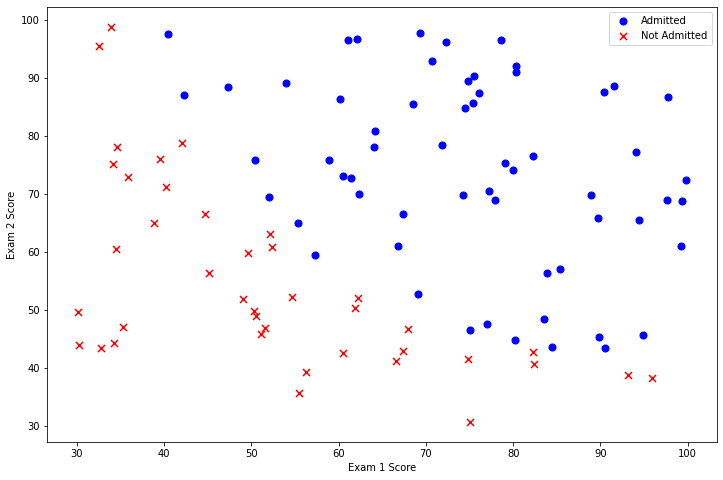

In [73]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

## Create Model

In [74]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim): 
        super(LogisticRegression,self).__init__()
        self.linear = torch.nn.Linear(input_dim,output_dim)
        #  
        self.criterion = torch.nn.BCELoss(reduction = 'mean')

    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    def cal_loss(self, pred, target):
        x = self.criterion(pred,target)
        return x

In [75]:
epochs = 100
input_dim = 2 # Two inputs x1 and x2 
output_dim = 1 # Single binary output 
learning_rate = 0.001

Initializing the Loss Function and the Optimizer


In [76]:
model = LogisticRegression(input_dim,output_dim)

In [77]:
#weight_decay  = 1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Create training data

In [78]:
cols = data.shape[1]

X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.array(X)
y = np.array(y) 

### for test

In [79]:
# convert to numpy arrays and initalize the parameter array theta
#X = np.array(X.values)
#y = np.array(y.values)

theta = np.zeros(2)
X = np.array(X)
y = np.array(y) 
# X = X.dot(theta) for test



inputs = Variable(torch.from_numpy(X).cuda())
labels = Variable(torch.from_numpy(y).cuda())
inputs = inputs.unsqueeze(1)


criterion = torch.nn.BCELoss(reduction = 'mean')
m = nn.Sigmoid()
#inputs = m(inputs)
#v = criterion(inputs.float(),labels.float())

First, we convert our inputs and labels from numpy arrays to tensors.


In [80]:
# fix random seed
def same_seeds(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  
    np.random.seed(seed)  
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
same_seeds(1)

In [95]:
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [82]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable (Gpu)
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(X).cuda())
        labels = Variable(torch.from_numpy(y).cuda())
    else:
        inputs = Variable(torch.from_numpy(X))
        labels = Variable(torch.from_numpy(y))


    # get output from the model, given the inputs, # Forward pass
    outputs = model(inputs.float())

    # compute loss
    mse_loss = model.cal_loss(outputs.float(), labels.float()) 

    mask = outputs.ge(0.5).float()
    correct = (mask == labels).sum()
    acc = correct.item()/ inputs.size(0)
 
    # 梯度归0
    optimizer.zero_grad()    
    # 反向传播   
    mse_loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss is {}'.format(epoch, mse_loss.item()))
    print('epoch {}, acc is {}'.format(epoch, acc))

epoch 0, loss is 8.404232025146484
epoch 0, acc is 0.4
epoch 1, loss is 4.537502765655518
epoch 1, acc is 0.37
epoch 2, loss is 1.9488788843154907
epoch 2, acc is 0.43
epoch 3, loss is 1.5387624502182007
epoch 3, acc is 0.55
epoch 4, loss is 1.480080485343933
epoch 4, acc is 0.53
epoch 5, loss is 1.43136727809906
epoch 5, acc is 0.54
epoch 6, loss is 1.3841274976730347
epoch 6, acc is 0.54
epoch 7, loss is 1.3379052877426147
epoch 7, acc is 0.54
epoch 8, loss is 1.29276442527771
epoch 8, acc is 0.54
epoch 9, loss is 1.2487881183624268
epoch 9, acc is 0.54
epoch 10, loss is 1.2060600519180298
epoch 10, acc is 0.54
epoch 11, loss is 1.1646689176559448
epoch 11, acc is 0.54
epoch 12, loss is 1.124707579612732
epoch 12, acc is 0.54
epoch 13, loss is 1.0862661600112915
epoch 13, acc is 0.54
epoch 14, loss is 1.0494370460510254
epoch 14, acc is 0.54
epoch 15, loss is 1.014304757118225
epoch 15, acc is 0.55
epoch 16, loss is 0.9809505939483643
epoch 16, acc is 0.56
epoch 17, loss is 0.9494465

## 正则化逻辑回归

在训练的第二部分，我们将要通过加入正则项提升逻辑回归算法。如果你对正则化有点眼生，或者喜欢这一节的方程的背景，请参考在"exercises"文件夹中的"ex2.pdf"。简而言之，正则化是成本函数中的一个术语，它使算法更倾向于“更简单”的模型（在这种情况下，模型将更小的系数）。这个理论助于减少过拟合，提高模型的泛化能力。这样，我们开始吧。
设想你是工厂的生产主管，你有一些芯片在两次测试中的测试结果。对于这两次测试，你想决定是否芯片要被接受或抛弃。为了帮助你做出艰难的决定，你拥有过去芯片的测试数据集，从其中你可以构建一个逻辑回归模型。


In [2]:
path =  'ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


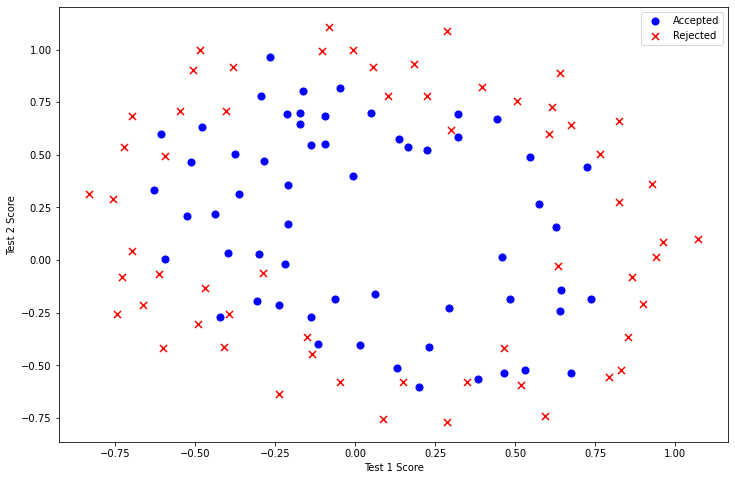

In [3]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

哇，这个数据看起来可比前一次的复杂得多。特别地，你会注意到其中没有线性决策界限，来良好的分开两类数据。一个方法是用像逻辑回归这样的线性技术来构造从原始特征的多项式中得到的特征。让我们通过创建一组多项式特征入手吧。

In [4]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


现在，我们需要修改第1部分的成本和梯度函数，包括正则化项。首先是成本函数：
# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$

首先初始化变量

In [5]:
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

In [6]:
X2.shape,   y2.shape

((118, 11), (118, 1))

cost function

In [7]:
criterion = torch.nn.BCELoss(reduction = 'mean')

In [8]:
learningRate = 1

In [9]:
class LogisticRegressionReg(torch.nn.Module):
    def __init__(self, input_dim, output_dim): 
        super(LogisticRegressionReg,self).__init__()
        self.poly = torch.nn.Linear(input_dim,output_dim)
        #  
        self.criterion = torch.nn.BCELoss(reduction = 'mean')

    def forward(self,x):
        y_pred = torch.sigmoid(self.poly(x))
        return y_pred
    def cal_loss(self, pred, target):
        x = self.criterion(pred,target)
        return x

In [40]:
input_dim = 11
output_dim = 1
learning_rate = 1
epochs = 1000
model = LogisticRegressionReg(input_dim,output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.00001 )


In [41]:
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [43]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable (Gpu)
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(X2).cuda())
        labels = Variable(torch.from_numpy(y2).cuda())
    else:
        inputs = Variable(torch.from_numpy(X2))
        labels = Variable(torch.from_numpy(y2))


    # get output from the model, given the inputs, # Forward pass
    outputs = model(inputs.float())

    # compute loss
    mse_loss = model.cal_loss(outputs.float(), labels.float()) 


 
    # 梯度归0
    optimizer.zero_grad()    
    # 反向传播   
    mse_loss.backward()

    # update parameters
    optimizer.step()

    mask = outputs.ge(0.5).float()
    correct = (mask == labels).sum()
    acc = correct.item()/ inputs.size(0)
    
    print('epoch {}, loss is {}'.format(epoch, mse_loss.item()))
    print('epoch {}, acc is {}'.format(epoch, acc))

epoch 0, loss is 0.5924578905105591
epoch 0, acc is 0.652542372881356
epoch 1, loss is 0.592432975769043
epoch 1, acc is 0.652542372881356
epoch 2, loss is 0.5924078822135925
epoch 2, acc is 0.652542372881356
epoch 3, loss is 0.5923829078674316
epoch 3, acc is 0.652542372881356
epoch 4, loss is 0.5923579335212708
epoch 4, acc is 0.652542372881356
epoch 5, loss is 0.5923331379890442
epoch 5, acc is 0.652542372881356
epoch 6, loss is 0.5923082828521729
epoch 6, acc is 0.652542372881356
epoch 7, loss is 0.5922834873199463
epoch 7, acc is 0.652542372881356
epoch 8, loss is 0.592258632183075
epoch 8, acc is 0.652542372881356
epoch 9, loss is 0.5922339558601379
epoch 9, acc is 0.652542372881356
epoch 10, loss is 0.5922093391418457
epoch 10, acc is 0.652542372881356
epoch 11, loss is 0.5921846628189087
epoch 11, acc is 0.652542372881356
epoch 12, loss is 0.5921601057052612
epoch 12, acc is 0.652542372881356
epoch 13, loss is 0.592135488986969
epoch 13, acc is 0.652542372881356
epoch 14, loss 